# Pandas basics

Before working with pandas (similarly to numpy or any other Python package) we first need to import it.


In [1]:
import pandas as pd

Pandas is a Python library that is widely used for data analysis and manipulation. It provides powerful tools for reading, writing, and processing data, and allows for efficient and flexible data manipulation.

Two of the main data structures in pandas are **Series** and **DataFrame** objects.

### Pandas Series
A pandas series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.). The axis labels are collectively referred to as the index. The basic method to create a Series is to call s = pd.Series(data, index=index)

Series act similarly to lists and dictionaries.

In [2]:
# Create a Pandas Series with some sample names as data
names = pd.Series(['Alice', 'Bob', 'Charlie', 'David', 'Emily'])

# View the series elements
print(names)

0      Alice
1        Bob
2    Charlie
3      David
4      Emily
dtype: object


In [3]:
# Access the first element of the Series
print(names[1])

Bob


In [4]:
# Access a slice of the Series from index 1 to index 3
print(names[1:4])

1        Bob
2    Charlie
3      David
dtype: object


### Pandas Dataframe

A DataFrame is a 2-dimensional labeled data structure with columns of potentially different types. You can think of it like a spreadsheet or SQL table, or a dict **of Series objects**. It is generally the most commonly used pandas object. Like Series, DataFrame accepts many different types of input:


*   Dict of 1D ndarrays, lists, dicts, or Series
*   2-D numpy.ndarray
*   Structured or record ndarray
*   A Series
*   Another DataFrame

In [5]:
# Create a Pandas DataFrame with some sample data
data = {'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Emily'],
        'Age': [25, 32, 18, 47, 51],
        'Gender': ['Female', 'Male', 'Male', 'Male', 'Female']}

df = pd.DataFrame(data)

# Print the DataFrame
print(df)

      Name  Age  Gender
0    Alice   25  Female
1      Bob   32    Male
2  Charlie   18    Male
3    David   47    Male
4    Emily   51  Female


In this example, we created a Pandas DataFrame called df with some sample data. The DataFrame has three columns - Name, Age, and Gender - and five rows of data. Each column represents a variable, and each row represents an observation. The index of the DataFrame is a sequence of integers starting from 0 and incrementing by 1 for each row.

In [6]:
# Accessing a specific data column
print(df['Name'])

0      Alice
1        Bob
2    Charlie
3      David
4      Emily
Name: Name, dtype: object


In [7]:
# Accessing a specific data row based on index
print(df.loc[0])

Name       Alice
Age           25
Gender    Female
Name: 0, dtype: object


In [8]:
# Accessing a specific data column and row
print(df['Name'].loc[0])

Alice


In [9]:
# Accessing the name of some rows
df.loc[1:3]['Name']

1        Bob
2    Charlie
3      David
Name: Name, dtype: object

# Heart disease patients data

### Let's get some hands-on practice with pandas

### Importing and viewing data

Below you can find a description of the first data we will be working with

* Age : Age of the patient

* Sex : Sex of the patient

* exang: exercise induced angina (1 = yes; 0 = no)

* ca: number of major vessels (0-3)

* cp : Chest Pain type

    Value 0: typical angina

    Value 1: atypical angina

    Value 2: non-anginal pain

    Value 3: asymptomatic
* trestbps : resting blood pressure (in mm Hg)

* chol : cholestoral in mg/dl fetched via BMI sensor

* fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

* rest_ecg : resting electrocardiographic results

    Value 0: normal

    Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach : maximum heart rate achieved

* target : 0 = less chance of heart attack 1 = more chance of heart attack

In [10]:
data = pd.read_csv("heart.csv") # Read dataset
data.head() # In Pandas, the .head() method is used to display the first few rows of a DataFrame. By default, .head() displays the first 5 rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
# You can check the df’s shape (similar to numpy arrays)
print("Entire data shape:", data.shape)

# The len() function works on dataframes
print(len(data))

Entire data shape: (303, 14)
303


In [12]:
# Retrieving age column
age = data['age']
print(age[:3]) # Displaying first 3 ages

0    63
1    37
2    41
Name: age, dtype: int64


In [13]:
# Accessing individual values from age column
print(age[0]) # Age of entry 0
print(age[150]) # Age of entry 150
print(age[300]) # Age of entry 300

63
66
68


In [14]:
# Retrieving specific rows
row_0 = data.loc[0] # Retrieve row 0 (1st row)
print(row_0, '\n')
print("Age of row 0 entry is:", row_0['age'])

age          63.0
sex           1.0
cp            3.0
trestbps    145.0
chol        233.0
fbs           1.0
restecg       0.0
thalach     150.0
exang         0.0
oldpeak       2.3
slope         0.0
ca            0.0
thal          1.0
target        1.0
Name: 0, dtype: float64 

Age of row 0 entry is: 63.0


In [15]:
# Sorting entries by properties (rows)
sorted_data = data.sort_values(['age', 'chol']) # The sort is not done in place, meaning that the data variable will remain the same
sorted_data.head()

# data.sort_values(['age', 'chol'], inplace=True) # Uncomment this line if you want sorting to be done in place
# data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2,1
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
65,35,0,0,138,183,0,1,182,0,1.4,2,0,2,1
157,35,1,1,122,192,0,1,174,0,0.0,2,0,2,1


In [16]:
# Filtering based on a property
data[data['age'] > 30].head() # Patients older than 30

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
# Filtering based on multiple properties
data[(data['chol'] > 300) & (data['age'] > 40)].head() # Patients with cholesterol level above 300 and older than 40

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2,1
25,71,0,1,160,302,0,1,162,0,0.4,2,2,2,1
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
36,54,0,2,135,304,1,1,170,0,0.0,2,0,2,1


In [18]:
# Get the average values for each age (e.g. 0.5 average on sex will mean that for that age number there are equally many men and women in the dataset)
data.groupby('age').mean()

,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,,,,,,,,,,,,,
29,1.000000,1.000000,130.000000,204.000000,0.000000,0.000000,202.000000,0.000000,0.000000,2.000000,0.000000,2.000000,1.000000
34,0.500000,2.000000,118.000000,196.000000,0.000000,0.500000,183.000000,0.000000,0.350000,2.000000,0.000000,2.000000,1.000000
35,0.750000,0.250000,126.500000,213.750000,0.000000,0.750000,160.500000,0.500000,0.750000,1.750000,0.000000,2.500000,0.500000
37,0.500000,2.000000,125.000000,232.500000,0.000000,1.000000,178.500000,0.000000,1.750000,1.000000,0.000000,2.000000,1.000000
38,1.000000,2.333333,132.000000,193.666667,0.000000,1.000000,176.000000,0.333333,1.266667,1.666667,2.666667,2.333333,0.666667
39,0.500000,1.500000,122.500000,239.750000,0.000000,0.750000,163.250000,0.000000,0.300000,1.500000,0.000000,2.250000,0.750000
40,1.000000,1.000000,134.000000,196.333333,0.000000,0.666667,157.666667,0.666667,1.133333,1.666667,0.000000,3.000000,0.333333
41,0.600000,1.200000,119.000000,220.700000,0.000000,0.600000,164.700000,0.100000,0.340000,1.800000,0.100000,2.000000,0.900000
42,0.750000,1.250000,127.000000,246.750000,0.125000,0.750000,160.250000,0.125000,0.500000,1.375000,0.250000,2.000000,0.875000


# Exercise - Data accessing in Heart disease patients (E1)

1. Calculate the percentage of patients who experienced exercise-induced angina.
2. Calculate the average age of patients with more than 2 major vessels.
3. Find the average resting blood pressure of patients with more than 1 major vessel.
4. Find the top 5 patients with the highest cholesterol levels, and display their age, sex, and cholesterol level in descending order of cholesterol level.

In [19]:
exang_percentage = ( data['exang'].sum() / len(data) ) * 100

exang_percentage

32.67326732673268

In [20]:
avg_age_2_more_major_vessels = data[ data['ca'] > 2 ]['age'].mean()

avg_age_2_more_major_vessels

57.08

In [21]:
avg_rbp_1_more_major_vessels = data[ data['ca'] > 1 ]['trestbps'].mean()

avg_rbp_1_more_major_vessels

135.96825396825398

In [22]:
top_5_highest_chol = data[['age','sex', 'chol']].sort_values(by='chol',ascending=False).head()

top_5_highest_chol

,age,sex,chol
85,67,0,564
28,65,0,417
246,56,0,409
220,63,0,407
96,62,0,394


# Exercise - Data Science Salaries in pandas (E2)

0. Load the ds_salaries dataset into a dataframe

1. Find the average salary for each experience level.

2. Find the average salary for each employment type in the United States.

3. Find the top 5 job titles with the highest average salary.

4. Calculate the percentage of employees who worked fully remotely in each company size category.

5. Find the top 3 countries with the highest average salary in USD.

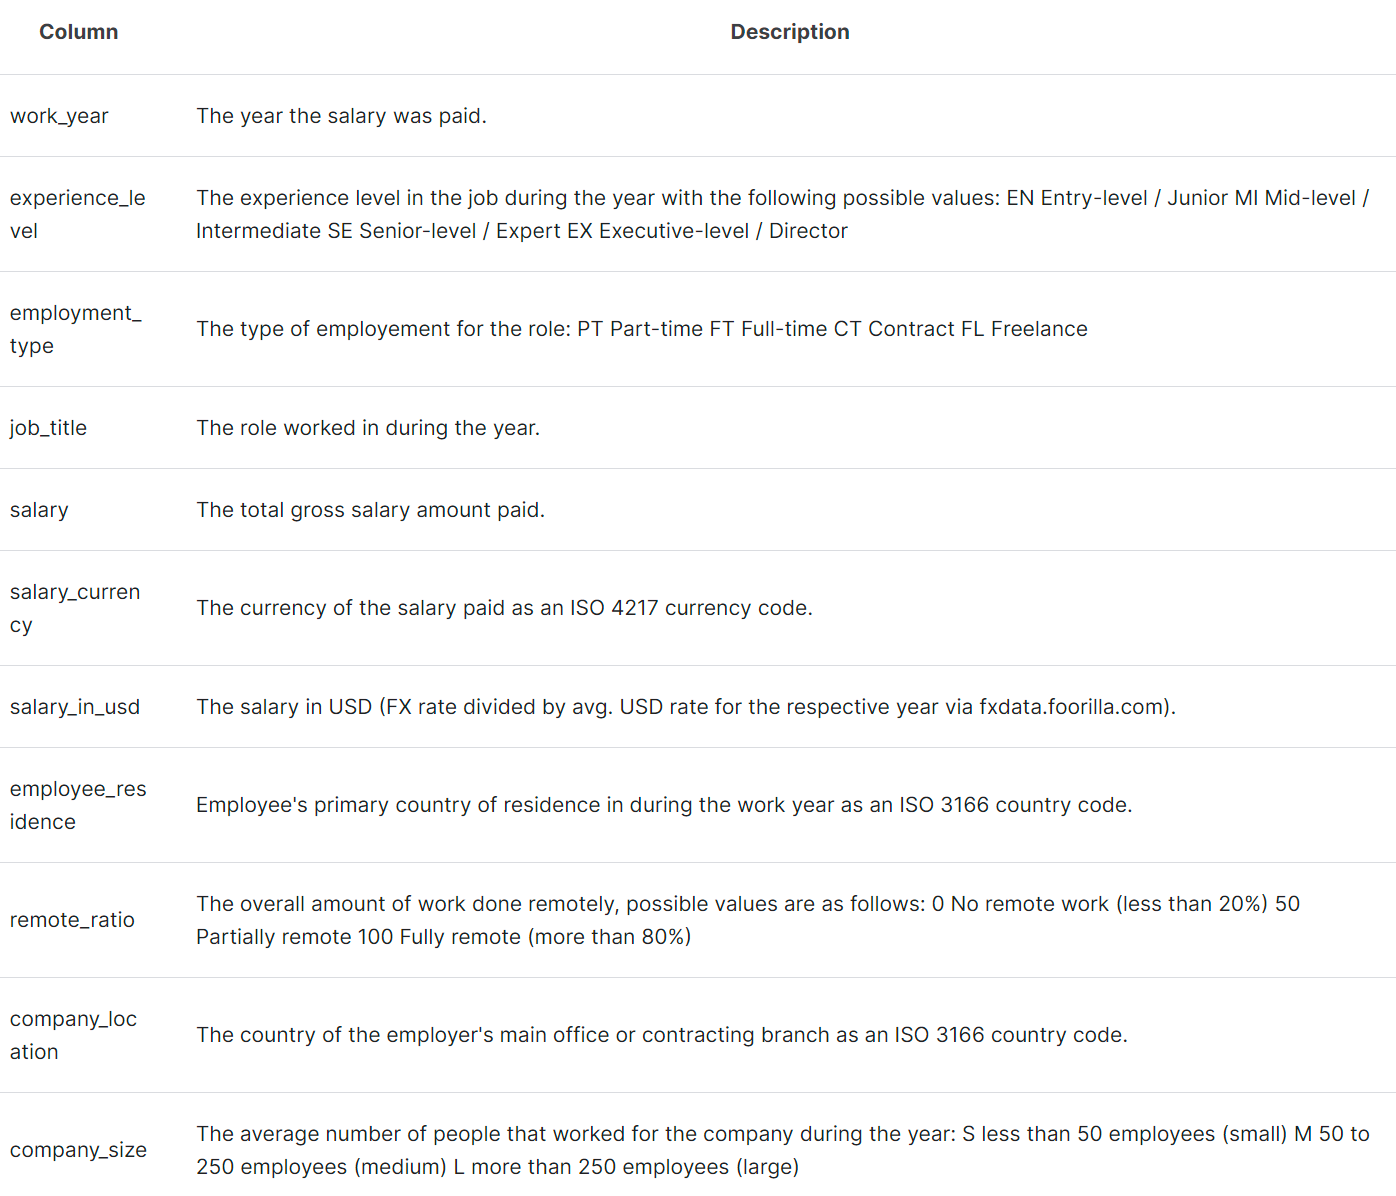Dataset Description:

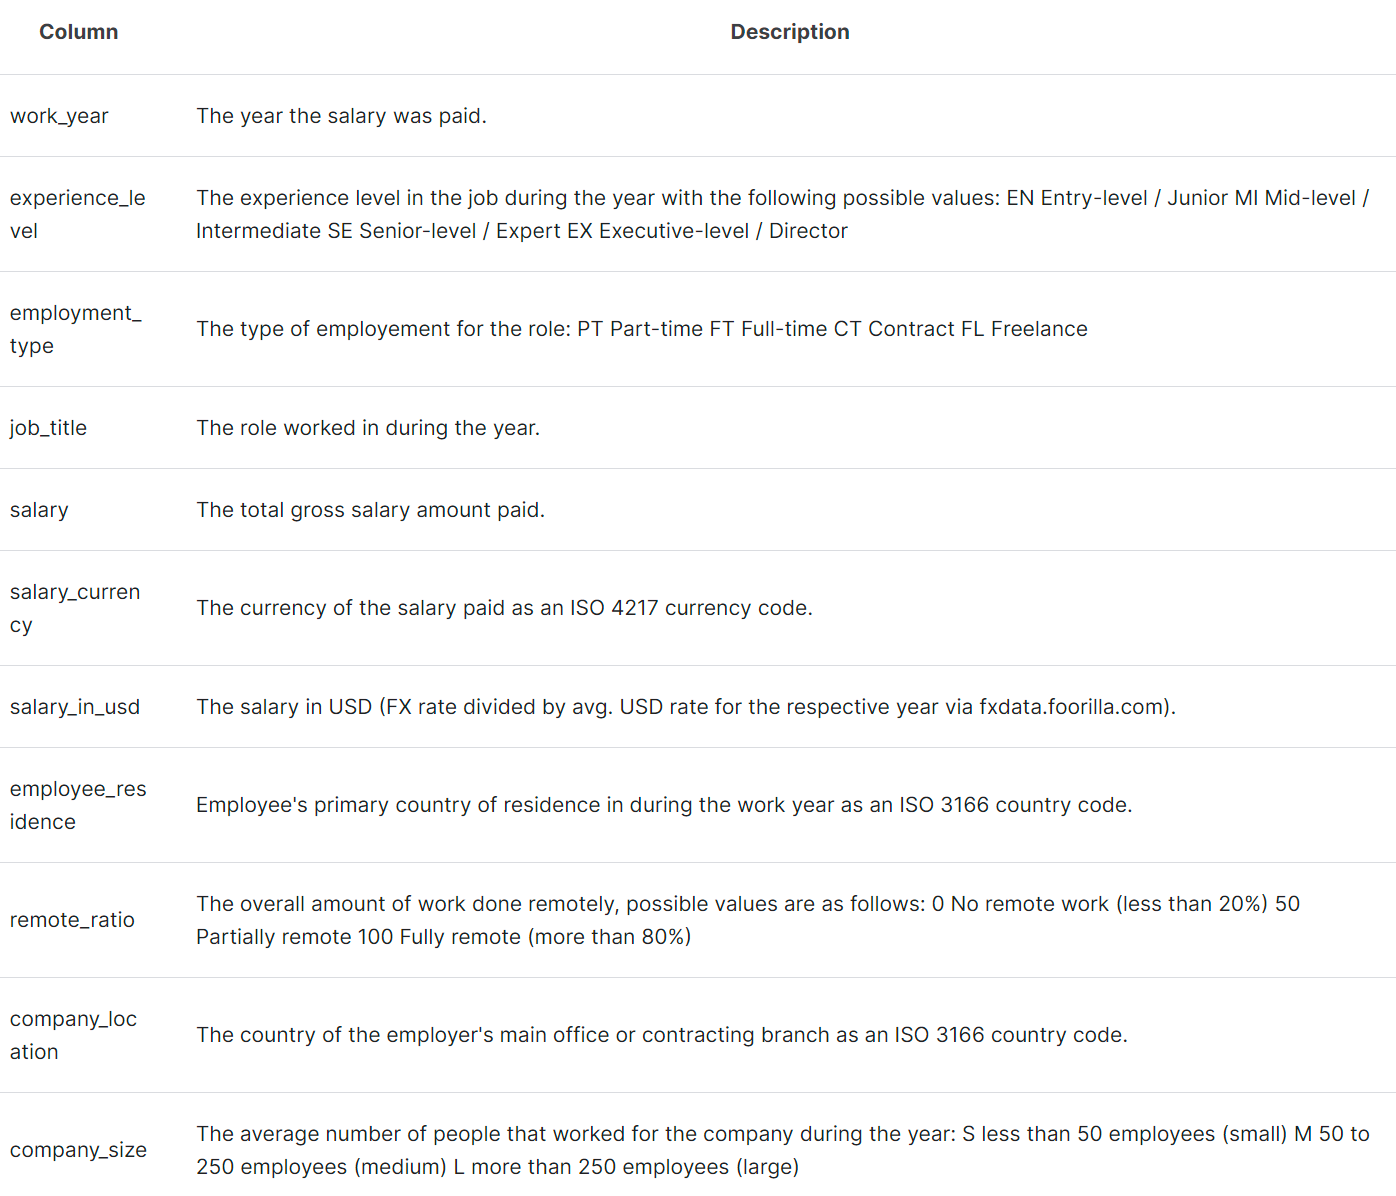

In [23]:
salaries_df = pd.read_csv("ds_salaries.csv")

salaries_df

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L
...,...,...,...,...,...,...,...,...,...,...,...,...
602,602,2022,SE,FT,Data Engineer,154000,USD,154000,US,100,US,M
603,603,2022,SE,FT,Data Engineer,126000,USD,126000,US,100,US,M
604,604,2022,SE,FT,Data Analyst,129000,USD,129000,US,0,US,M
605,605,2022,SE,FT,Data Analyst,150000,USD,150000,US,100,US,M


In [24]:
avg_salaries_exp_lvl = salaries_df.groupby('experience_level')['salary_in_usd'].mean()

avg_salaries_exp_lvl

experience_level
EN     61643.318182
EX    199392.038462
MI     87996.056338
SE    138617.292857
Name: salary_in_usd, dtype: float64

In [25]:
avg_salary_emp_us = salaries_df[salaries_df['company_location'] == 'US'].groupby('employment_type')['salary_in_usd'].mean()

avg_salary_emp_us

employment_type
CT    222750.000000
FL     60000.000000
FT    144637.624277
PT     12000.000000
Name: salary_in_usd, dtype: float64

In [26]:
top_5_highest_salary_jobs = salaries_df.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False).head()
top_5_highest_salary_jobs

job_title
Data Analytics Lead         405000.000000
Principal Data Engineer     328333.333333
Financial Data Analyst      275000.000000
Principal Data Scientist    215242.428571
Director of Data Science    195074.000000
Name: salary_in_usd, dtype: float64

In [27]:
remote_percentage = salaries_df[salaries_df['remote_ratio'] == 100].groupby('company_size')['remote_ratio'].count() / salaries_df.groupby('company_size')['remote_ratio'].count() * 100

remote_percentage

company_size
L    53.535354
M    69.325153
S    59.036145
Name: remote_ratio, dtype: float64

In [28]:
top_3_countries = salaries_df.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False).head(3)

top_3_countries

company_location
RU    157500.000000
US    144055.261972
NZ    125000.000000
Name: salary_in_usd, dtype: float64

# Data Cleaning


In order to make sense of our data we often need to clean it first.
Data cleaning can generally be summarized as bringing your data into a form that is easily explorable. Having your data in a clean form should save you a lot of trouble and time when doing your investigations.

On top of that, the results of your analysis may become way more valuable if you get rid of all sorts of noise that can be found in your initial data.

Examples of data cleaning:
*   Finding structure for your data - if you were to analyze an entire book, you would probably not want to work with a single string containing all the text data. Simply trying to access and view subparts of the text would be a pain.

*generally apply for numeric data*
*   Getting rid of empty/NaN entries - you don't want these polluting your data
*   Sometimes getting rid of 0 values for numeric data

*generally apply for text data*
*   Separating your texts into pages/sentences/words
*   Bringing all of your text data into the same case sensitivity
*   Getting rid of punctuation
*   Getting rid of frequent words that hold little meaning for our investigation (words like 'the', 'and', etc.)
*   Other forms of text normalization (stemming, lemmatization - we'll be touching on them in another lab)


### Poem

Say we have this short poem:

In [29]:
poem = """Because I could not stop for Death -",
          "He kindly stopped for me -",
          "The Carriage held but just Ourselves -",
          "and Immortality"""


Let's import it into a dataframe where each word will be a row of the df

In [30]:
!pip install nltk # nltk will help us tokenize our words, but we need to install the package first
import nltk
import re
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('punkt_tab')

ERROR: Invalid requirement: '#'
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sergiu.varga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\sergiu.varga\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [31]:
# First we split string into words
poem_words = [word for word in word_tokenize(poem)]

# Remove punctuation
poem_words = [word for word in poem_words if not re.match(r'[^\w\s]', word)]

print(poem_words)

['Because', 'I', 'could', 'not', 'stop', 'for', 'Death', 'He', 'kindly', 'stopped', 'for', 'me', 'The', 'Carriage', 'held', 'but', 'just', 'Ourselves', 'and', 'Immortality']


In [32]:
df_poem = pd.DataFrame({
    "word": poem_words
}) # and create our dataframe from the list

df_poem.head(10)

,word
0,Because
1,I
2,could
3,not
4,stop
5,for
6,Death
7,He
8,kindly
9,stopped


### Getting an entire book into a dataframe
We'll be getting our data from the Gutenberg project http://www.gutenberg.org/

Download Sense and Sensibility by Jane Austen (http://www.gutenberg.org/ebooks/161)

In [33]:
import requests
import string

# URL of the book you want to download
book_url = 'https://www.gutenberg.org/files/161/161-0.txt'

# Send a GET request to the URL and download the text
response = requests.get(book_url)
sense_sensibility = response.text

# Uncomment this if you encounter weird characters
# Remove unwanted characters from the text
allowed_chars = string.ascii_letters + string.digits + string.whitespace
sense_sensibility = ''.join(c for c in sense_sensibility if c in allowed_chars)

# Print the first 5000 characters of the book text
print(sense_sensibility[:5000])

The Project Gutenberg eBook of Sense and Sensibility by Jane Austen

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever You may copy it give it away or reuse it under the terms
of the Project Gutenberg License included with this eBook or online at
wwwgutenbergorg If you are not located in the United States you
will have to check the laws of the country where you are located before
using this eBook

Title Sense and Sensibility

Author Jane Austen

Release Date September 1994 eBook 161
Most recently updated March 16 2021

Language English

Character set encoding UTF8

Special thanks are due to Sharon Partridge for extensive proofreading and correction of this etext

 START OF THE PROJECT GUTENBERG EBOOK SENSE AND SENSIBILITY 

Illustration




Sense and Sensibility

by Jane Austen

1811


Contents

 CHAPTER I
 CHAPTER II
 CHAPTER III
 CHAPTER IV
 CHAPTER V
 CHAPTER VI
 CHAPTER VII
 CHAP

In [34]:
print(len(sense_sensibility)) # Length of our book

678927


In [35]:
# Create our dataframe
import re
sense_sensibility_lines = sense_sensibility.splitlines()

sense_sensibility_df = pd.DataFrame({
    "line": sense_sensibility_lines,
    "line_number": list(range(len(sense_sensibility_lines)))
})

sense_sensibility_df.head(110)


,line,line_number
0,The Project Gutenberg eBook of Sense and Sensi...,0
1,,1
2,This eBook is for the use of anyone anywhere i...,2
3,most other parts of the world at no cost and w...,3
4,whatsoever You may copy it give it away or reu...,4
...,...,...
105,into his house the family of his nephew Mr Hen...,105
106,inheritor of the Norland estate and the person...,106
107,bequeath it In the society of his nephew and n...,107
108,children the old Gentlemans days were comforta...,108


### Chapter extraction

In [42]:
# We create a helper function to identify the chapter of each line
def line_is_chapter(dataframe):
    chapter_list = []
    curr_chapter = 0
    for index, row in dataframe.iterrows():
        if re.search("^chapter [\\divxlc]*$", row['line'], re.IGNORECASE):
            curr_chapter += 1
        chapter_list.append(curr_chapter)
    return chapter_list

curr_chapter = 0
# We add the chapter to our dataframe
sense_sensibility_df = sense_sensibility_df.assign(chapter = line_is_chapter(sense_sensibility_df))
sense_sensibility_df.head(1110)

,line,line_number,chapter
0,The Project Gutenberg eBook of Sense and Sensi...,0,0
1,,1,0
2,This eBook is for the use of anyone anywhere i...,2,0
3,most other parts of the world at no cost and w...,3,0
4,whatsoever You may copy it give it away or reu...,4,0
...,...,...,...
1105,within the last hour and as she was a very che...,1105,7
1106,he hoped the young ladies would not find it so...,1106,7
1107,imagine The young ladies as well as their moth...,1107,7
1108,satisfied with having two entire strangers of ...,1108,7


In [ ]:
# We will now transform our dataframe into one that has one word per row

# We first split the text column into a list of words
sense_sensibility_df['word'] = sense_sensibility_df['line'].str.split()

# Explode the words column to create a new row for each word (this creates a separate row for each word from the newly created words list)
sense_sensibility_df = sense_sensibility_df.explode('word')

# Reset the index of the dataframe (we want to index each word now)
sense_sensibility_df = sense_sensibility_df.reset_index(drop=True)
sense_sensibility_df[10000:10010]

# !Careful on this code cell, it always works with the same dataframe, so running it twice will give different results

In [ ]:
# Seeing the number of appearances per word

# pd.set_option('display.max_rows', 100) # You can change the max number of rows that get displayed
print(sense_sensibility_df['word'].value_counts()) # one way to see word counts in pandas

# Cleaning mini-exercise 1 (E3)




1. Display the most frequent 100 words.
2. Display the least frequent 20 words.


In [ ]:
most_freq = sense_sensibility_df['word'].value_counts().head(100)

most_freq

In [ ]:
least_freq = sense_sensibility_df['word'].value_counts().tail(20)

least_freq

### Stop words


Stop words are words that are frequent in any context and don't give much (if any) information by themselves. For this reason we usually eliminate them before trying to get meaningful information from our data.

Examples of stop words are:

*  Determiners – Determiners tend to mark nouns where a determiner usually will be followed by a noun

    examples: the, a, an, another
*  Coordinating conjunctions – Coordinating conjunctions connect words, phrases, and clauses

    examples: for, an, nor, but, or, yet, so
*  Prepositions – Prepositions express temporal or spatial relations

    examples: in, under, towards, before

In [ ]:
sense_sensibility_df.head()

In [ ]:
stop_words_test = ['illustration', 'companion', 'of']

sense_sensibility_df_filtered = sense_sensibility_df[~sense_sensibility_df['word'].isin(stop_words_test)] # Get all of the data from sense_sensibility_df where the word can not be found in the stop words list
sense_sensibility_df_filtered.head()

In [ ]:
# nltk already has a list of common stopwords
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

print(stopwords.words('english'))

# Cleaning mini-exercise 2 (E4)



Filter out common stop words from your sense_sensibility_df dataframe. Use nltk's 'english' stop words list to do so.

*(You can change the sense_sensibility_df variable, no need to make a copy)*

Display the top 10 most commonly occurring words **after having applied your stop word filtering.**

In [ ]:
sense_sensibility_df = sense_sensibility_df[~sense_sensibility_df['word'].isin(stopwords.words('english'))]

print( sense_sensibility_df['word'].value_counts().head(10) )


# Exercise - Perform your own data cleaning (E5)

Try one of the most recent entries in the Gutenberg project - **Asphodel : a novel by M. E. Braddon**

Import Asphodel Gutenberg, bring it into a clean dataframe containing all of the words as separate row entries (**get rid of punctuation signs, bring everything to lowercase, get rid of NaN values, get rid of common stop words**).

As previously for the Sense and Sensibility example, **each row should contain the word index, the line index and the chapter index** of where the word appeared.
*Careful on the chapters separation, **they may not be defined in the same way** as they were in Sense & Sensibility.*



**After** you have your clean dataframe:

1. Display all of the words that occur more than 100 times in the book.
2. Extend the old stop words list with the words that you notice occur more than 100 times and can be considered stop words.

    Apply the stop words filtering with the newly extended list and display once again all of the words that occur more than 100 times.
3. Display the 3 most frequent words from chapters 3 and 6.

In [53]:
import requests
import string
import re
from nltk.corpus import stopwords

# URL of the book you want to download
book_url = 'https://www.gutenberg.org/cache/epub/75506/pg75506.txt'

# Send a GET request to the URL and download the text
response = requests.get(book_url)
asphodel = response.text

# Uncomment this if you encounter weird characters
# Remove unwanted characters from the text
allowed_chars = string.ascii_letters + string.digits + string.whitespace
asphodel = ''.join(c.lower() for c in asphodel if c in allowed_chars )


asphodel_lines = asphodel.splitlines()

asphodel_df = pd.DataFrame({
    "line": asphodel_lines,
    "line_number": list(range(len(asphodel_lines)))
})

asphodel_df = asphodel_df.assign(chapter = line_is_chapter(asphodel_df))
asphodel_df['word'] = asphodel_df['line'].str.split()
asphodel_df = asphodel_df.explode('word')
asphodel_df = asphodel_df.reset_index(drop=True)

asphodel_df = asphodel_df.dropna()
stop_words = stopwords.words('english')
asphodel_df = asphodel_df[~asphodel_df['word'].isin(stop_words)]
asphodel_df = asphodel_df.reset_index(drop=True)

asphodel_df[100:1000]

,line,line_number,chapter,word
100,stereotyped edition,46,0,edition
101,london,48,0,london
102,simpkin marshall hamilton kent co limited,50,0,simpkin
103,simpkin marshall hamilton kent co limited,50,0,marshall
104,simpkin marshall hamilton kent co limited,50,0,hamilton
...,...,...,...,...
995,outline with her facile pencil i would rather ...,300,1,outline
996,outline with her facile pencil i would rather ...,300,1,facile
997,outline with her facile pencil i would rather ...,300,1,pencil
998,outline with her facile pencil i would rather ...,300,1,would


In [59]:
asphodel_word_counts = asphodel_df['word'].value_counts()

asphodel_freq_words = asphodel_word_counts[asphodel_word_counts > 100]

print(asphodel_freq_words[0:])

daphne    1162
said       672
would      613
one        500
edgar      495
          ... 
side       103
almost     103
work       102
many       101
great      101
Name: word, Length: 116, dtype: int64


In [67]:
stop_words.extend(["said","would","many","almost","one","could"])
asphodel_df = asphodel_df[~asphodel_df['word'].isin(stop_words)]
asphodel_df = asphodel_df.reset_index(drop=True)

asphodel_word_counts = asphodel_df['word'].value_counts()
asphodel_freq_words = asphodel_word_counts[asphodel_word_counts > 100]
print(asphodel_freq_words[0:])

daphne    1162
edgar      495
like       411
little     388
gerald     351
          ... 
give       105
rhoda      103
side       103
work       102
great      101
Name: word, Length: 110, dtype: int64


In [69]:
chapters_3_6_df = asphodel_df[asphodel_df['chapter'].isin([3,6])]

chapters_3_6_df['word'].value_counts().head(3)

daphne    101
dont       50
like       39
Name: word, dtype: int64

# Multiple books

### Getting started
Let's create a dataframe containing information from multiple books. We'll choose 4 books from the Bronte Sisters.

In [70]:
import requests
import string

# Jane Eyre
book_url = 'https://www.gutenberg.org/files/1260/1260-0.txt'
response = requests.get(book_url)
bronte1 = response.text
allowed_chars = string.ascii_letters + string.digits + string.whitespace
bronte1 = ''.join(c for c in bronte1 if c in allowed_chars)

# Wuthering Heights
book_url = 'https://www.gutenberg.org/cache/epub/768/pg768.txt'
response = requests.get(book_url)
bronte2 = response.text
allowed_chars = string.ascii_letters + string.digits + string.whitespace
bronte2 = ''.join(c for c in bronte2 if c in allowed_chars)

# Vilette
book_url = 'https://www.gutenberg.org/files/9182/9182-0.txt'
response = requests.get(book_url)
bronte3 = response.text
allowed_chars = string.ascii_letters + string.digits + string.whitespace
bronte3 = ''.join(c for c in bronte3 if c in allowed_chars)

# Agnes Gray
book_url = 'https://www.gutenberg.org/files/767/767-0.txt'
response = requests.get(book_url)
bronte4 = response.text
allowed_chars = string.ascii_letters + string.digits + string.whitespace
bronte4 = ''.join(c for c in bronte4 if c in allowed_chars)

In [71]:
# Create our dataframes
bronte1_lines = bronte1.splitlines()

bronte1_df = pd.DataFrame({
    "line": bronte1_lines,
    "line_number": list(range(len(bronte1_lines)))
})

bronte2_lines = bronte2.splitlines()

bronte2_df = pd.DataFrame({
    "line": bronte2_lines,
    "line_number": list(range(len(bronte2_lines)))
})

bronte3_lines = bronte3.splitlines()

bronte3_df = pd.DataFrame({
    "line": bronte3_lines,
    "line_number": list(range(len(bronte3_lines)))
})

bronte4_lines = bronte4.splitlines()

bronte4_df = pd.DataFrame({
    "line": bronte4_lines,
    "line_number": list(range(len(bronte4_lines)))
})


bronte4_df.head()

,line,line_number
0,START OF THE PROJECT GUTENBERG EBOOK 767,0
1,,1
2,,2
3,,3
4,,4


In [72]:
# We’ll want to know which content comes from which book
bronte1_df = bronte1_df.assign(book = 'Jane Eyre')
bronte2_df = bronte2_df.assign(book = 'Wuthering Heights')
bronte3_df = bronte3_df.assign(book = 'Vilette')
bronte4_df = bronte4_df.assign(book = 'Agnes Grey')

In [73]:
# Finally, we concatenate the books into one dataframe
books = [bronte1_df, bronte2_df, bronte3_df, bronte4_df]
bronte_books_df = pd.concat(books)
bronte_books_df.head()

,line,line_number,book
0,START OF THE PROJECT GUTENBERG EBOOK 1260,0,Jane Eyre
1,,1,Jane Eyre
2,JANE EYRE,2,Jane Eyre
3,AN AUTOBIOGRAPHY,3,Jane Eyre
4,,4,Jane Eyre


In [74]:
# What shapes do the books have before concatenation?

print('Jane Eyre', bronte1_df.shape)
print('Wuthering Heights', bronte2_df.shape)
print('Vilette', bronte3_df.shape)
print('Agnes Grey', bronte4_df.shape)

print('\nAll 4 Bronte sisters books', bronte_books_df.shape)

Jane Eyre (21005, 3)
Wuthering Heights (12726, 3)
Vilette (21574, 3)
Agnes Grey (6993, 3)

All 4 Bronte sisters books (62298, 3)


In [75]:
# We first split the text column into a list of words
bronte_books_df['word'] = bronte_books_df['line'].str.split()

# Explode the words column to create a new row for each word (this creates a separate row for each word from the newly created words list)
bronte_books_df = bronte_books_df.explode('word')

# Reset the index of the dataframe (we want to index each word now)
bronte_books_df = bronte_books_df.reset_index(drop=True)
bronte_books_df[10000:10010]

# !Careful on this code cell, it always works with the same dataframe, so running it twice will give different results

,line,line_number,book,word
10000,as I best might and sought shelter from cold a...,1153,Jane Eyre,and
10001,as I best might and sought shelter from cold a...,1153,Jane Eyre,sought
10002,as I best might and sought shelter from cold a...,1153,Jane Eyre,shelter
10003,as I best might and sought shelter from cold a...,1153,Jane Eyre,from
10004,as I best might and sought shelter from cold a...,1153,Jane Eyre,cold
10005,as I best might and sought shelter from cold a...,1153,Jane Eyre,and
10006,as I best might and sought shelter from cold a...,1153,Jane Eyre,darkness
10007,as I best might and sought shelter from cold a...,1153,Jane Eyre,in
10008,as I best might and sought shelter from cold a...,1153,Jane Eyre,my
10009,as I best might and sought shelter from cold a...,1153,Jane Eyre,crib


# Exercise - Multiple Books / Multiple Authors (E6)



1. **Remove all the NaNs and common stop words** from your Bronte sisters dataframe and then **view the most commonly occurring words** in the sisters' writings.
2. **Create a similar dataframe (just like the one for the Bronte sisters) using 3 books from an author of your choice**.
    Make sure all 3 books are from the same author.

    **View the most commonly used words from your author of choice** (after you've removed NaN and stop words from your dataframe).

3. Combine the 2 dataframes (Bronte sisters df + your author df) into a frame that contains **all of the previous information + information about the author** for each of the words in the dataframe.

 (Hint: This can be done similarly to how you've added the book name information to your Bronte books dataframe - add a column with the author name to each of the 2 initial dataframes. Concatenating these 2 "upgraded" dataframes should now give you the desired result.)

    Your columns should be: **index, line, book, word, *author*** (the order does not matter).

In [78]:
bronte_books_df = bronte_books_df.dropna()

bronte_books_df = bronte_books_df[~bronte_books_df['word'].isin(stopwords.words('english'))]

bronte_books_df['word'].value_counts()

I                18440
would             2182
said              1700
could             1553
one               1452
                 ...  
wellformed           1
youthlike            1
halfcivilised        1
lurked               1
Eton                 1
Name: word, Length: 29976, dtype: int64

In [80]:
import requests
import string

# The Antichrist
book_url = 'https://www.gutenberg.org/cache/epub/19322/pg19322.txt'
response = requests.get(book_url)
bronte1 = response.text
allowed_chars = string.ascii_letters + string.digits + string.whitespace
niet1 = ''.join(c for c in bronte1 if c in allowed_chars)

# Ecce Homo
book_url = 'https://www.gutenberg.org/cache/epub/52190/pg52190.txt'
response = requests.get(book_url)
bronte2 = response.text
allowed_chars = string.ascii_letters + string.digits + string.whitespace
niet2 = ''.join(c for c in bronte2 if c in allowed_chars)

# Beyond Good and Evil
book_url = 'https://www.gutenberg.org/files/9182/9182-0.txt'
response = requests.get(book_url)
bronte3 = response.text
allowed_chars = string.ascii_letters + string.digits + string.whitespace
niet3 = ''.join(c for c in bronte3 if c in allowed_chars)


In [82]:
# Create our dataframes
niet1_lines = niet1.splitlines()

niet1_df = pd.DataFrame({
    "line": niet1_lines,
    "line_number": list(range(len(niet1_lines)))
})

niet2_lines = niet2.splitlines()

niet2_df = pd.DataFrame({
    "line": niet2_lines,
    "line_number": list(range(len(niet2_lines)))
})

niet3_lines = niet3.splitlines()

niet3_df = pd.DataFrame({
    "line": niet3_lines,
    "line_number": list(range(len(niet3_lines)))
})


In [83]:
niet1_df = niet1_df.assign(book ='The Antichrist')
niet2_df = niet2_df.assign(book ='Ecce Homo')
niet3_df = niet3_df.assign(book ='Beyond Good and Evil')

In [92]:
niet_books = [ niet1_df, niet2_df, niet3_df ]
niet_books_df = pd.concat(niet_books)

# We first split the text column into a list of words
niet_books_df['word'] = niet_books_df['line'].str.split()

# Explode the words column to create a new row for each word (this creates a separate row for each word from the newly created words list)
niet_books_df = niet_books_df.explode('word')

niet_books_df = niet_books_df.dropna()
niet_books_df = niet_books_df[~niet_books_df['word'].isin(stopwords.words('english'))]
niet_books_df = bronte_books_df.reset_index(drop=True)

niet_books_df['word'].value_counts().head()

I        18440
would     2182
said      1700
could     1553
one       1452
Name: word, dtype: int64

In [96]:
niet_books_df = niet_books_df.assign( author = 'Friedrich Wilhelm Nietzsche' )
bronte_books_df = bronte_books_df.assign( author = 'Bronte Sisters' )

books_df = pd.concat([niet_books_df,bronte_books_df])

books_df

,line,line_number,book,word,author
0,START OF THE PROJECT GUTENBERG EBOOK 1260,0,Jane Eyre,START,Friedrich Wilhelm Nietzsche
1,START OF THE PROJECT GUTENBERG EBOOK 1260,0,Jane Eyre,OF,Friedrich Wilhelm Nietzsche
2,START OF THE PROJECT GUTENBERG EBOOK 1260,0,Jane Eyre,THE,Friedrich Wilhelm Nietzsche
3,START OF THE PROJECT GUTENBERG EBOOK 1260,0,Jane Eyre,PROJECT,Friedrich Wilhelm Nietzsche
4,START OF THE PROJECT GUTENBERG EBOOK 1260,0,Jane Eyre,GUTENBERG,Friedrich Wilhelm Nietzsche
...,...,...,...,...,...
579034,END OF THE PROJECT GUTENBERG EBOOK 767,6992,Agnes Grey,THE,Bronte Sisters
579035,END OF THE PROJECT GUTENBERG EBOOK 767,6992,Agnes Grey,PROJECT,Bronte Sisters
579036,END OF THE PROJECT GUTENBERG EBOOK 767,6992,Agnes Grey,GUTENBERG,Bronte Sisters
579037,END OF THE PROJECT GUTENBERG EBOOK 767,6992,Agnes Grey,EBOOK,Bronte Sisters
